# CPI prediction project - STATS 131
Group memebers: Kaixin Wang, Qin Hu, Ruby Zhang, and Emily Suan

## 1. Objective:
Predict CPI (customer price index) of countries using predictors relevant to economic growth. 

## 2. Introduction:
### Datasets:
* GDP_and_GDP_Per_Capita.csv (1)
* Expenditure_on_Health.csv (2)
* Production_Trade_and_Supply_of_Energy.csv (3)
* Internet_Usage.csv (4)
* Public_Expenditure_on_Education.csv (5)
* Tourist_Visitors_Arrival_and_Expenditure.csv (6)
* GDP_on_R&D.csv (7)
* Exchange_Rates.csv (8)
* Consumer_Price_Index.csv (9)

### Variables from datasets:
* response: CPI (9)
* predictors:
    - GDP (1)
    - expenditure on health (2)
    - energy usage (3)
    - Internet usage (4)
    - expenditure on education (5)
    - expenditure on tourism (6)
    - expenditure on science & technology (7)
    - exchange rate (8)
    
### Datasets sources:
United Nations: http://data.un.org/
- National accounts (1)
    - GDP and GDP per capita
- Nutrition and health (2)
    - Health expenditure
- Energy (3)
    - Energy production, trade and consumption
- Communication (4)
    - Internet usage
- Education (5)
    - Public expenditure on education
- Science and technology (7)
    - Human resources in R & D
- Finance (8)
    - Exchange rates
- Price and production indices (9)
    - Consumer price indices
   

## 3.  Data Clean-up:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

In [3]:
CPI = pd.read_csv("Consumer_Price_Index.csv", encoding ="ISO-8859-1")
CPI.Series.unique()      # to extra certain rows
CPI = CPI.loc[CPI.Series == 'Consumer price index: General']
countries = CPI.Country.unique()
CPI.head()
CPI.describe()

,ID,Year,Value
count,1243.000000,1243.00000,1243.000000
mean,422.092518,2010.87852,113.465245
std,248.315099,6.85628,142.542578
min,4.000000,1995.00000,0.000000
25%,212.000000,2010.00000,98.300000
50%,418.000000,2014.00000,106.900000
75%,634.000000,2016.00000,120.300000
max,894.000000,2017.00000,4583.700000


 - The Consumer Price Index (CPI) is a measure of the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services. 
 - It can be calculated as updated cost divided by base period cost times 100. 
 - In this project, we only consider the general market. 
 - The annual percentage change in a CPI is used as a measure of inflation. Generally, if increase rate of CPI in one year is larger than 3%, the country can be considered as having an inflation.

 - The data set provides CPI of 1995 to 2017 for each country. 
 - CPI of year 2010 is set as an index base of 100. For example, Afghanistan at year 2014 had a value of 133.1, this can be interpreted as that there was 33.1% increase in inflation since 2010.    
 
 
 - The origin of data is United Nations Statistics Division (UNSD), New York, Monthly Bulletin of Statistics (MBS), last accessed May 2018.

In [4]:
health = pd.read_csv("Expenditure_on_Health.csv", encoding ="ISO-8859-1")
health = health.loc[health.Series == 'Current health expenditure (% of GDP)']
health.head()
health.Value.describe()

count    1129.000000
mean        6.406112
std         2.915264
min         0.800000
25%         4.400000
50%         5.900000
75%         8.000000
max        26.300000
Name: Value, dtype: float64

 - The value is the percentage of GDP that each country expends on health. 
 - The data set provides values of 2000 to 2015 for each country.  
 
 - The average percentage is 6.4, the median is 5.9, and the 75th percentile is 8.0. So we can see that Afghanistan relatively has more percentage that spends on health than average.

 - The origin of data is World Health Organization (WHO), Geneva, WHO Global Health Expenditure database, last accessed March 2018. The estimates are in line with the 2011 System of Health Accounts (SHA).

In [5]:
GDP = pd.read_csv("GDP_and_GDP_Per_Capita.csv", encoding ="ISO-8859-1")
gdp = GDP.loc[GDP.Series == "GDP per capita (US dollars)"]
gdp.Value.describe()

count      1451.000000
mean      12586.084080
std       20869.037211
min          79.000000
25%        1171.000000
50%        3932.000000
75%       14755.000000
max      168003.000000
Name: Value, dtype: float64

- The gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a period of time.
- The GDP per capita divides the country's GDP by its total population.
- The data set provides GDP of 1985 to 2017 for each country. 
- The unit is in millions of US dollars at current and constant 2010 prices.  
 

- The average GDP per capita is 12586.1, the median is 3932.0, and the 75th percentile is 14755.0. So we can see that Afghanistan has a relatively low GDP per capita.  
 

- The origin of data is United Nations Statistics Division, New York, National Accounts Statistics: Analysis of Main Aggregates (AMA) database, last accessed February 2018.

In [6]:
energy = pd.read_csv("Production_Trade_and_Supply_of_Energy.csv", encoding ="ISO-8859-1" )
energy = energy.loc[energy.Series == "Primary energy production (petajoules)"]
energy.Value.describe()

count      1651.000000
mean       2294.987886
std        8565.910899
min           0.000000
25%           8.000000
50%         132.000000
75%         971.500000
max      101498.000000
Name: Value, dtype: float64

 - Primary energy sources include fossil fuels (petroleum, natural gas, and coal), nuclear energy, and renewable sources of energy.
 - The data set provides data of 1990 to 2016 for each country. 
 - The unit of energy is in petajoule. 1 Petajoule equals to a quadrillion joules. 10^15 joules.  
 

 - The average value is 2295.0, the median is 132.0, and the 75th percentile is 971.5. So we can see that Afghanistan has a relatively low primary energy production.  
 

 - The origin of data is United Nations Statistics Division, New York, Energy Statistics Yearbook 2016, last accessed January 2019.

In [7]:
internet = pd.read_csv("Internet_Usage.csv", encoding ="ISO-8859-1" )
internet.Value.describe()

count    1506.000000
mean       38.198340
std        30.419562
min         0.000000
25%         9.100000
50%        33.250000
75%        65.000000
max        99.000000
Name: Value, dtype: float64

 - The value shows the percentage of individuals using the internet. 
 - The data set provides percentage of 2000 to 2017 for each country.   
 

 - The average value is 38.2, the median is 33.3, and the 75th percentile is 65.0. So we can see that Afghanistan has a relatively low percentage of internet usage.  
 

 - The origin of data is International Telecommunication Union (ITU), Geneva, the ITU database, last accessed January 2019.

In [8]:
education = pd.read_csv("Public_Expenditure_on_Education.csv", encoding ="ISO-8859-1" )
education = education.loc[education.Series == "Public expenditure on education (% of government expenditure)"]
education.Value.describe()

count    577.000000
mean      15.015251
std        5.388521
min        0.800000
25%       11.100000
50%       14.400000
75%       18.200000
max       44.800000
Name: Value, dtype: float64

 - The value measures the percentage of public expenditure on education over goverment expenditure. 
 - The years range from 2000 to 2018.   
 

 - The average value is 15.0, the median is 14.4, and the 75th percentile is 18.2. So we can see that Albania has a relatively low percentage of educational expenditure. 
 

 - The origin of data is United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed March 2019.

In [9]:
tourism = pd.read_csv("Tourist_Visitors_Arrival_and_Expenditure.csv", encoding ="ISO-8859-1" )
tourism = tourism.loc[tourism.Series == "Tourism expenditure (millions of US dollars)"]
tourism.Value.describe()

count      1079.000000
mean       6025.848007
std       17792.255719
min           0.000000
25%         171.500000
50%         828.000000
75%        4508.000000
max      251361.000000
Name: Value, dtype: float64

 - Tourism expenditure refers to the total consumption expenditure made by a visitor, or on behalf of a visitor for goods and services during his/her trip and stay at the destination place (country). It also includes payments in advance or after the trip for services received during the trip. 
 - The data set provides data of 1995 to 2017 for each country.  
 

 - The average value is 6025.8, the median is 828.0, and the 75th percentile is 4508.0. So we can see that Afghanistan has a relatively low tourism expenditure.    
 

 - The origin of data is World Tourism Organization (UNWTO), Madrid, the UNWTO Statistics Database, last accessed January 2019.

In [10]:
technology = pd.read_csv("GDP_on_R&D.csv", encoding ="ISO-8859-1" )
tech = technology.loc[technology.Series == 'Gross domestic expenditure on R & D: as a percentage of GDP (%)']
tech.Value.describe()

count    431.000000
mean       0.852668
std        0.937531
min        0.000000
25%        0.200000
50%        0.500000
75%        1.200000
max        4.300000
Name: Value, dtype: float64

 - The gross domestic spending on research and development (R&D) is defined as the total expenditure on R&D as a percentage of its GDP (in USD). It carried out by all resident companies, research institutes, university and government laboratories, etc., in a country. It is considered an indicator of the country’s degree of R&D intensity and is a commonly used summary statistic for international comparisons. 
 - The years range from 2000 to 2016.  
 
 
 - The average value is 0.85, the median is 0.50, and the 75th percentile is 1.20. So we can see that Albania has a relatively low expenditure on R&D.   
 

 - The origin of data is United Nations Educational, Scientific and Cultural Organization (UNESCO), Montreal, the UNESCO Institute for Statistics (UIS) statistics database, last accessed September 2018.

In [11]:
rates = pd.read_csv("Exchange_Rates.csv", encoding ="ISO-8859-1" )
rates = rates.loc[rates.Series == "Exchange rates: period average (national currency per US dollar)"]
rates.Value.describe()

count     1687.000000
mean       450.674155
std       2221.031597
min          0.000000
25%          1.200000
50%          6.000000
75%         90.100000
max      33226.300000
Name: Value, dtype: float64

 - In finance, an exchange rate is the rate at which one currency will be exchanged for another. It is also regarded as the value of one country’s currency in relation to another currency. 
 - The value is the exchange rate of each country's currency to USD in a specific year. 
 - The data set provides data of 1985 to 2017 for each country.  

 - An exchange rate appreciation causes a slower growth of real GDP because of a fall in net exports (reduced injection) and a rise in the demand for imports (an increased leakage in the circular flow). Thus, a higher exchange rate can have a negative multiplier effect on the economy.   
 

 - The average value is 450.7, the median is 6.0, and the 75th percentile is 90.1. So we can see that Afghanistan has a relatively low exchange rate.  
 

 - The origin of data is International Monetary Fund (IMF), Washington, D.C., the database on International Financial Statistics supplemented by operational rates of exchange for United Nations programmes, last accessed June 2018.

In [12]:
gdp.pivot(index = "Year", columns = "Country", values = "Value").head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Boliv. Rep. of),Viet Nam,Yemen,Zambia,Zanzibar,Zimbabwe
Year,,,,,,,,,,,,,,,,,,,,,
1985,282.0,783.0,2564.0,9837.0,859.0,4072.0,3508.0,3144.0,NaN,6108.0,...,18017.0,1735.0,NaN,1020.0,3425.0,79.0,NaN,399.0,NaN,872.0
1995,189.0,770.0,1452.0,23359.0,466.0,10583.0,7841.0,7993.0,426.0,16442.0,...,28758.0,6609.0,589.0,1621.0,3375.0,276.0,387.0,417.0,235.0,846.0
2005,264.0,2615.0,3100.0,41281.0,1891.0,18129.0,11453.0,5125.0,1753.0,23303.0,...,44173.0,5221.0,543.0,1886.0,5433.0,684.0,925.0,691.0,408.0,481.0
2010,558.0,4056.0,4463.0,39734.0,3586.0,19459.0,12175.0,10346.0,3432.0,23513.0,...,48574.0,11938.0,1382.0,2966.0,13566.0,1310.0,1309.0,1463.0,587.0,720.0
2015,611.0,3895.0,4163.0,36040.0,4171.0,22622.0,13602.0,14853.0,3618.0,25796.0,...,56948.0,15525.0,2160.0,2871.0,11054.0,2065.0,990.0,1319.0,795.0,1033.0


In [13]:
# pivoting all datasets:
CPI = CPI.pivot(index = "Year", columns = "Country", values = "Value")
GDP = gdp.pivot(index = "Year", columns = "Country", values = "Value")
energy = energy.pivot(index = "Year", columns = "Country", values = "Value")
health = health.pivot(index = "Year", columns = "Country", values = "Value")
education = education.pivot(index = "Year", columns = "Country", values = "Value")
tech = tech.pivot(index = "Year", columns = "Country", values = "Value")
internet = internet.pivot(index = "Year", columns = "Country", values = "Value")
rates = rates.pivot(index = "Year", columns = "Country", values = "Value")
tourism = tourism.pivot(index = "Year", columns = "Country", values = "Value")

In [14]:
name = 'United States of America'
table1 = pd.DataFrame(CPI.loc[:, name])
table1 = pd.concat([table1, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]), pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Education", "Internet", "Tourism", "Health"])
table1 = table1.swaplevel().unstack()
table1.fillna(method = "ffill", inplace = True)
table1.fillna(method = "bfill", inplace = True)

In [15]:
table1.head()

United States of America                                             
                       Energy     Tech Education Internet Tourism   Health
Year                                                                      
1985                     69.9  18017.0   68588.0      2.5    43.1  93743.0
1990                     69.9  18017.0   68588.0      2.5    43.1  93743.0
1995                     69.9  28758.0   68963.0      2.5    43.1  93743.0
2000                     69.9  28758.0   69339.0      2.5    43.1  93743.0
2001                     69.9  28758.0   69339.0      2.5    43.1  93743.0

In [16]:
name = 'China'
table2 = pd.DataFrame(CPI.loc[:, name])
table2 = pd.concat([table2, pd.DataFrame(GDP.loc[:, name]), pd.DataFrame(energy.loc[:, name]), pd.DataFrame(tech.loc[:, name]), pd.DataFrame(rates.loc[:, name]), pd.DataFrame(internet.loc[:, name]), pd.DataFrame(tourism.loc[:, name]), pd.DataFrame(health.loc[:, name])], keys = ["Energy", "Tech", "Rates", "Internet", "Tourism", "Health"])
table2 = table2.swaplevel().unstack()
table2.fillna(method = "ffill", inplace = True)
table2.fillna(method = "bfill", inplace = True)

In [17]:
table2.head()

China                                        
     Energy   Tech    Rates Internet Tourism Health
Year                                               
1985  100.0  289.0  32727.0      1.3     2.9    1.8
1990  100.0  289.0  32727.0      1.3     2.9    1.8
1995  100.0  592.0  39692.0      1.3     8.4    1.8
2000  100.0  592.0  40783.0      1.3     8.4    1.8
2001  100.0  592.0  40783.0      1.3     8.4    1.8

## 4. Exploratory Data Analysis:

In [18]:
# processing data:
rates["United States of America"] = 1.0   # rates for US is always 1
education["China"] = 0                    # no entries for education of China
CPI["China"].loc[CPI["China"].index == 2016] = CPI["China"].loc[CPI["China"].index == 2015].iloc[0] * CPI["China"].loc[CPI["China"].index == 2016].iloc[0] / 100
CPI["China"].loc[CPI["China"].index == 2017] = CPI["China"].loc[CPI["China"].index == 2015].iloc[0]  * CPI["China"].loc[CPI["China"].index == 2017].iloc[0] / 100
years = CPI.index
# since CPI = 100 for year 2010 (base year)
years = [1995, 2005, 2014, 2015, 2016, 2017]

In [19]:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]), pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table], axis = 1)
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.loc[years, name])
    table = pd.concat([table, pd.DataFrame(GDP.loc[years, name]), pd.DataFrame(energy.loc[years, name]), pd.DataFrame(tech.loc[years, name]), pd.DataFrame(education.loc[years, name]), pd.DataFrame(rates.loc[years, name]), pd.DataFrame(internet.loc[years, name]), pd.DataFrame(tourism.loc[years, name]), pd.DataFrame(health.loc[years, name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"])
    table = table.swaplevel().unstack()
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table], axis = 1)
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

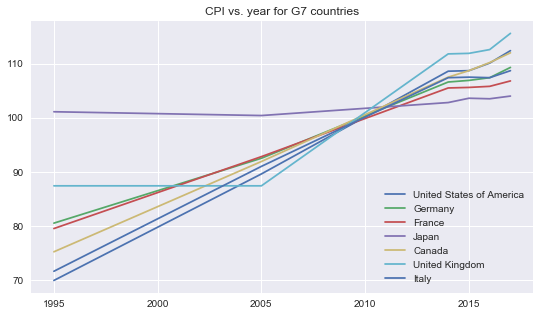

In [20]:
plt.figure(figsize = (9, 5))
for i in range(7):
    plt.plot(df1.index, df1[G7[i]].CPI, label = G7[i])
    plt.legend()
    plt.title("CPI vs. year for G7 countries")
plt.show()

 - For all G7 countries except Japan and United Kingdom, the CPI had continuously increased from 1995 to 2014, but the rate of increment had decreased from 2015 to 2017. 
 - To achieve an economic growth, developed countries pursue a goal of 2% increment in CPI each year. 

 - On the other hand, if the increase rate of CPI is low, the increase rate of prices would be low as well, thus customers would tend to delay purcahses and consumption, which in turn reduces overall economic activity and limits the economic growth.   
 
 
 - CPI of Japan had maintained at around 102 in this time period because it was under depression. Japan had the highest CPI in 1995 but had the lowest CPI in 2017 compared to other G7 countries.   
 
 - The line of CPI of United Kingdom is flat from year 1995 to 2005 because the CPI is missing in this time period. CPI of United Kingdom was the lowest in 2005, but it became the highest in 2017.   
 

- Because CPI of year 2010 is set as an index base of 100, we can see in the plot, at year 2010, all countries had CPI of 100.

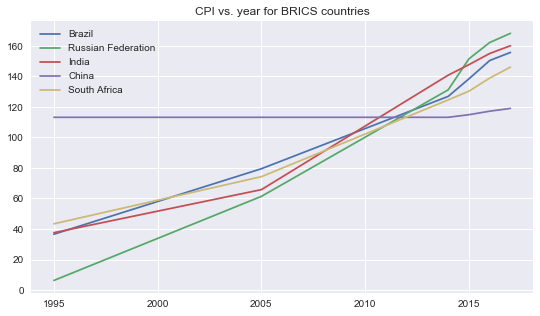

In [21]:
plt.figure(figsize = (9, 5))
for i in range(5):
    plt.plot(df2.index, df2[BRICS[i]].CPI, label = BRICS[i])
    plt.legend()
    plt.title("CPI vs. year for BRICS countries")
plt.show()

# come back later
- CPI of all BRICS countries were continuously increased from 1995 to 2017 except China.
- The line of China is flat before year 2010 because of missing values.

In [22]:
# Final dataframe for modeling:
G7 = ["United States of America", "Germany", "France", "Japan", "Canada", "United Kingdom", "Italy"]
BRICS = ["Brazil", "Russian Federation", "India", "China", "South Africa"]
df1 = pd.DataFrame()
for name in G7: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]), pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"], axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df1 = pd.concat([df1, table])
    
df2 = pd.DataFrame()
for name in BRICS: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]), pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"], axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df2 = pd.concat([df2, table])
    
df1.fillna(0, inplace = True)
df2.fillna(0, inplace = True)

df1.columns = df1.columns.droplevel(1)
df1["Country"] = df1.index.get_level_values(1)
df1.index = df1.index.droplevel(1)
df2.columns = df2.columns.droplevel(1)
df2["Country"] = df2.index.get_level_values(1)
df2.index = df2.index.droplevel(1)

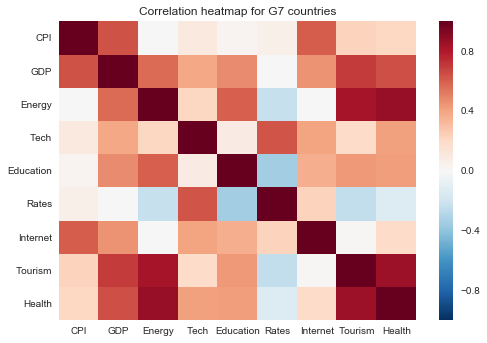

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health
CPI,1.000000,0.635231,0.004209,0.094490,0.024644,0.057702,0.603672,0.226905,0.204881
GDP,0.635231,1.000000,0.566710,0.389412,0.472322,0.000052,0.448515,0.697273,0.643213
Energy,0.004209,0.566710,1.000000,0.218402,0.596894,-0.228006,0.005587,0.833641,0.871232
Tech,0.094490,0.389412,0.218402,1.000000,0.079500,0.628720,0.403439,0.193145,0.412377
Education,0.024644,0.472322,0.596894,0.079500,1.000000,-0.349489,0.366237,0.434638,0.416917
Rates,0.057702,0.000052,-0.228006,0.628720,-0.349489,1.000000,0.227365,-0.245600,-0.137512
Internet,0.603672,0.448515,0.005587,0.403439,0.366237,0.227365,1.000000,0.009633,0.194322
Tourism,0.226905,0.697273,0.833641,0.193145,0.434638,-0.245600,0.009633,1.000000,0.856595
Health,0.204881,0.643213,0.871232,0.412377,0.416917,-0.137512,0.194322,0.856595,1.000000


In [23]:
corr = df1.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
plt.title("Correlation heatmap for G7 countries")
plt.show()
corr

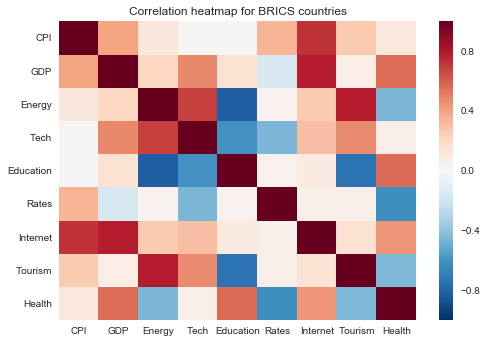

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health
CPI,1.000000,0.397548,0.114049,0.011822,0.009338,0.341825,0.719207,0.265609,0.106135
GDP,0.397548,1.000000,0.209489,0.483707,0.149363,-0.169871,0.787094,0.073416,0.559502
Energy,0.114049,0.209489,1.000000,0.679992,-0.825651,0.046559,0.259245,0.787208,-0.458878
Tech,0.011822,0.483707,0.679992,1.000000,-0.607607,-0.456791,0.302228,0.474215,0.067872
Education,0.009338,0.149363,-0.825651,-0.607607,1.000000,0.045039,0.095796,-0.736679,0.570032
Rates,0.341825,-0.169871,0.046559,-0.456791,0.045039,1.000000,0.059896,0.067193,-0.620344
Internet,0.719207,0.787094,0.259245,0.302228,0.095796,0.059896,1.000000,0.154858,0.440551
Tourism,0.265609,0.073416,0.787208,0.474215,-0.736679,0.067193,0.154858,1.000000,-0.452931
Health,0.106135,0.559502,-0.458878,0.067872,0.570032,-0.620344,0.440551,-0.452931,1.000000


In [24]:
corr = df2.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
plt.title("Correlation heatmap for BRICS countries")
plt.show()
corr

In [25]:
# adding country_code variable:
# G7 countires: United States of America, Germany, France, Japan, Canada, United Kingdon and Italy
# BRICS countires: Brazil, Russian Federation, India, China and South Africa
code1 = {"United States of America" : 1, "Germany" : 2, "France" : 3, "Japan" : 4, "Canada" : 5, 
         "United Kingdom" : 6, "Italy" : 7}
code2 = {"Brazil" : 8, "Russian Federation" : 9, "India" : 10, "China" : 11, "South Africa" : 12}
df1["Country_code"] = [code1[country] for country in df1.Country]
df2["Country_code"] = [code2[country] for country in df2.Country]
df1.head()

,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code
Year,,,,,,,,,,,
1995,69.9,28758.0,68963.0,2.5,13.5,1.0,68.0,93743.0,14.5,United States of America,1
2005,89.6,44173.0,68124.0,2.5,13.5,1.0,68.0,122077.0,14.5,United States of America,1
2014,108.6,44173.0,83426.0,2.5,13.5,1.0,73.0,122077.0,16.5,United States of America,1
2015,108.7,56948.0,84051.0,2.5,13.5,1.0,74.6,249183.0,16.8,United States of America,1
2016,110.1,58064.0,79672.0,2.7,13.5,1.0,75.2,246172.0,16.8,United States of America,1


In [26]:
CPI.loc[years, G7].agg(["min","max"])

,United States of America,Germany,France,Japan,Canada,United Kingdom,Italy
min,69.9,80.5,79.5,100.4,75.2,87.4,71.6
max,112.4,109.3,106.8,104.0,112.0,115.6,108.7


In [27]:
CPI.loc[years, BRICS].agg(["min","max"])

,Brazil,Russian Federation,India,China,South Africa
min,36.6,6.3,37.6,113.2000,43.4
max,155.7,168.2,160.1,119.0364,146.1


In [28]:
# adding categorical label for response variable:
df1["CPI_Level"] = [4 if var > 150 else 3 if var > 120 else 2 if var > 80 else 1 for var in df1["CPI"]]
df2["CPI_Level"] = [4 if var > 150 else 3 if var > 120 else 2 if var > 80 else 1 for var in df2["CPI"]]

In [29]:
# reset the index of dataframes and create a column of years:
df1.reset_index(inplace = True)
df2.reset_index(inplace = True)
df2.head()

,Year,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code,CPI_Level
0,1995,36.6,4794.0,5038.0,1.0,11.3,0.9,21.0,1085.0,8.0,Brazil,8,1
1,2005,79.5,4770.0,8344.0,1.0,11.3,2.4,21.0,4168.0,8.0,Brazil,8,1
2,2014,126.9,4770.0,10965.0,1.0,15.7,2.4,54.6,4168.0,8.4,Brazil,8,3
3,2015,138.4,8750.0,11842.0,1.3,15.7,3.3,58.3,6254.0,8.9,Brazil,8,3
4,2016,150.4,8634.0,12183.0,1.3,15.7,3.5,60.9,6613.0,8.9,Brazil,8,4


In [30]:
# drop one entry in United Kingdom where CPI is missing:
print("Dimension before removing one missing obseration:", df1.shape)
df1.drop([31], inplace = True)
df1.reset_index(inplace = True)
df1.drop("index", axis = 1, inplace = True)
print("Dimension after removing one missing obseration:", df1.shape)

Dimension before removing one missing obseration: (42, 13)
Dimension after removing one missing obseration: (41, 13)


In [31]:
# remove two entries where CPI of China are missing:
print("Dimension before removing two missing obseration:", df2.shape)
df2.drop([18, 19], inplace = True)
df2.reset_index(inplace = True)
df2.drop("index", axis = 1, inplace = True)
print("Dimension before removing two missing obserations:", df2.shape)

Dimension before removing two missing obseration: (30, 13)
Dimension before removing two missing obserations: (28, 13)


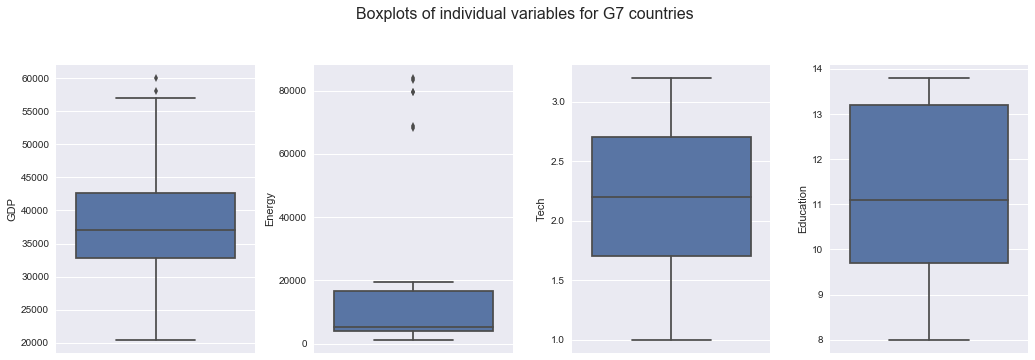

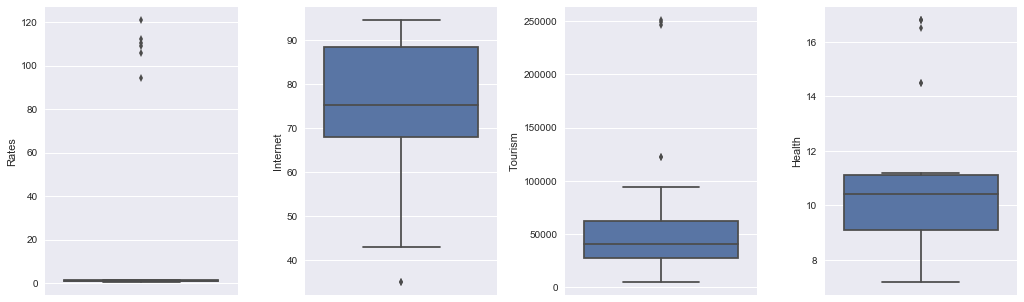

In [32]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,figsize=(20,8))
plt.suptitle("Boxplots of individual variables for G7 countries", fontsize=16,y=1.1,x=0.45)
plt.subplots_adjust(bottom = 0.5, right = 0.8, top = 1, wspace = 0.3)
sns.boxplot(y=df1['GDP'], ax=ax1)
sns.boxplot(y=df1['Energy'], ax=ax2)
sns.boxplot(y=df1['Tech'], ax=ax3)
sns.boxplot(y=df1['Education'], ax=ax4)
fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4,figsize=(20,8))
plt.subplots_adjust(bottom = 0.5, right = 0.8, top = 1, wspace = 0.35)
sns.boxplot(y=df1['Rates'], ax=ax5)
sns.boxplot(y=df1['Internet'], ax=ax6)
sns.boxplot(y=df1['Tourism'], ax=ax7)
sns.boxplot(y=df1['Health'], ax=ax8)
plt.show()

- GDP
    - all the outliers are the GDP per capita of USA, which are all above 55000 dollars. 
    - the median is around 37000 dollars.
- Energy
    - except outliers, primary energy production of G7 countries are in the range of 0 to 20000 petajoules.
    - all the outliers are primary energy production of USA, which are all above 60000 petajoules, obviously higher than other G7 countries.
    - the median is around 6000 petajoules.
- Rates
    - except outliers, exchange rates of G7 countries are close to 1.
    - all the outliers are the exchange rates of Japan in different years, which are all above 80.  
- Internet
    - the only outlier is the internet usage of Italy in early years, but they catched up later.
    - the median of internet usage is around 75%.
- Tourism
    - all the outliers are the tourism expenditure of USA, which are all above 100000 dollars. 
    - the median of tourism expenditure is around 45000 dollars.
- Health
    - all the outliers are the health expenditure of USA, which are all above 14% of GDP. 
    - the median of health expenditure is around 10.2% of GDP.
- Tech, Education
    - no outliers.
    - the median of expenditure on tech is around 2.1% of GDP.
    - the median of expenditure on education is around 11% of government expenditure.

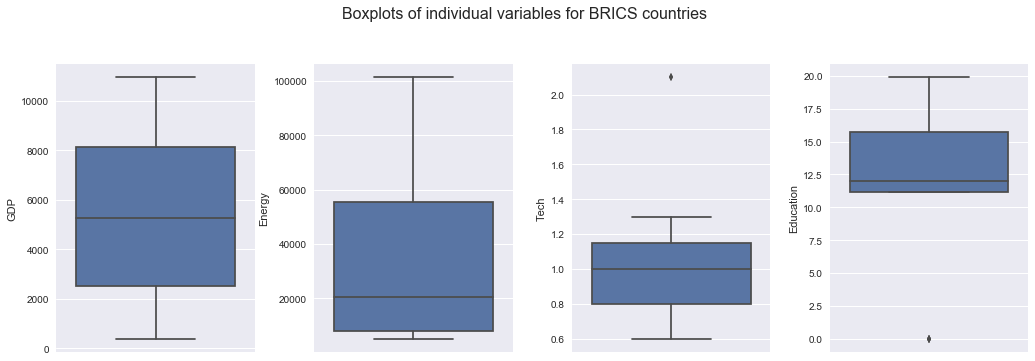

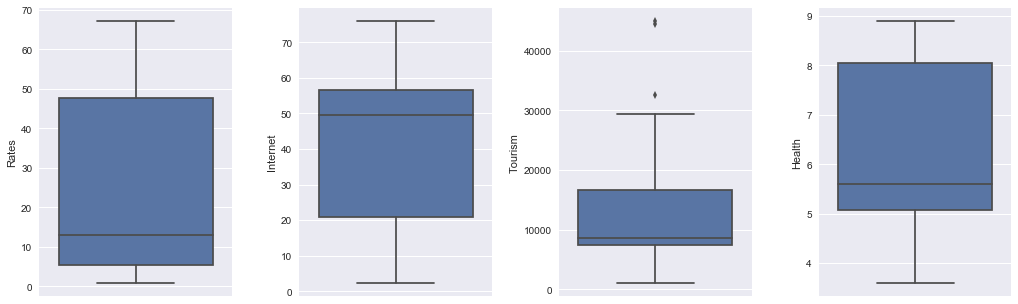

In [33]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,figsize=(20,8))
plt.suptitle("Boxplots of individual variables for BRICS countries", fontsize=16,y=1.1,x=0.45)
plt.subplots_adjust(bottom = 0.5, right = 0.8, top = 1, wspace = 0.3)
sns.boxplot(y=df2['GDP'], ax=ax1)
sns.boxplot(y=df2['Energy'], ax=ax2)
sns.boxplot(y=df2['Tech'], ax=ax3)
sns.boxplot(y=df2['Education'], ax=ax4)
fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4,figsize=(20,8))
plt.subplots_adjust(bottom = 0.5, right = 0.8, top = 1, wspace = 0.35)
sns.boxplot(y=df2['Rates'], ax=ax5)
sns.boxplot(y=df2['Internet'], ax=ax6)
sns.boxplot(y=df2['Tourism'], ax=ax7)
sns.boxplot(y=df2['Health'], ax=ax8)
plt.show()

- GDP
    - the median is around 5500 dollars.
- Energy
    - the median is around 20000 petajoules.
- Tech
    - the outliers are expenditure on tech of China in recent years, which exceeded other BRICS countries.
    - the median of expenditure on tech is around 1% of GDP.
- Education
    - the outliers are expenditure on education of China, which are missing values.
    - the median of expenditure on education is around 12.5% of government expenditure.
- Rates
    - the median of exchange rates is around 14.
- Internet
    - the median of internet usage is around 50%.
- Tourism
    - the outliers are tourism expenditure of China in recent years, which exceeded other BRICS countries.
    - the median of tourism expenditure is around 9500 dollars.
- Health
    - the median of health expenditure is around 5.6% of GDP.

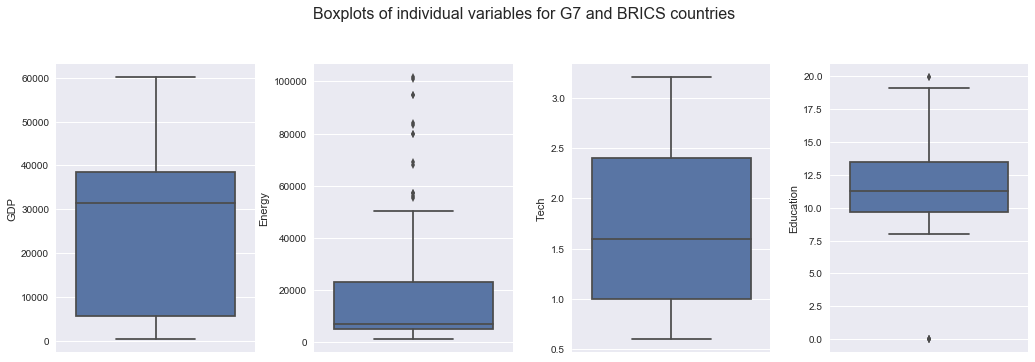

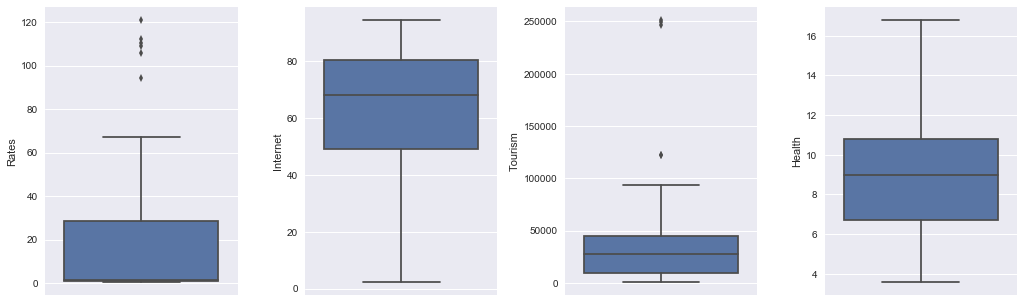

In [34]:
df = pd.concat([df1, df2])
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4,figsize=(20,8))
plt.suptitle("Boxplots of individual variables for G7 and BRICS countries", fontsize=16,y=1.1,x=0.45)
plt.subplots_adjust(bottom = 0.5, right = 0.8, top = 1, wspace = 0.3)
sns.boxplot(y=df['GDP'], ax=ax1)
sns.boxplot(y=df['Energy'], ax=ax2)
sns.boxplot(y=df['Tech'], ax=ax3)
sns.boxplot(y=df['Education'], ax=ax4)
fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4,figsize=(20,8))
plt.subplots_adjust(bottom = 0.5, right = 0.8, top = 1, wspace = 0.35)
sns.boxplot(y=df['Rates'], ax=ax5)
sns.boxplot(y=df['Internet'], ax=ax6)
sns.boxplot(y=df['Tourism'], ax=ax7)
sns.boxplot(y=df['Health'], ax=ax8)
plt.show()

# come back later
- GDP
    - the median is around 5500 dollars.
- Energy
    - the median is around 20000 petajoules.
- Tech
    - the outliers are expenditure on tech of China in recent years, which exceeded other BRICS countries.
    - the median of expenditure on tech is around 1% of GDP.
- Education
    - the outliers are expenditure on education of China, which are missing values.
    - the median of expenditure on education is around 12.5% of government expenditure.
- Rates
    - the median of exchange rates is around 14.
- Internet
    - the median of internet usage is around 50%.
- Tourism
    - the outliers are tourism expenditure of China in recent years, which exceeded other BRICS countries.
    - the median of tourism expenditure is around 9500 dollars.
- Health
    - the median of health expenditure is around 5.6% of GDP.

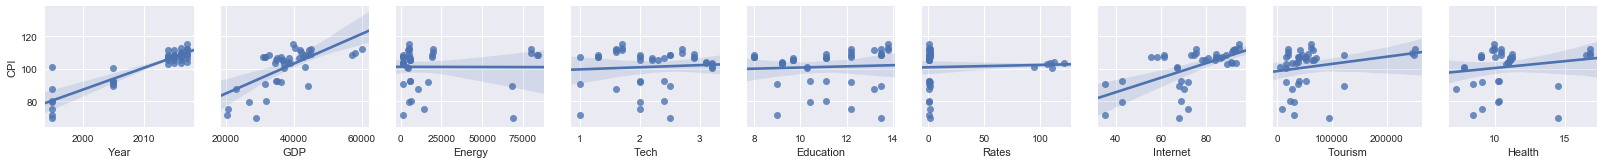

In [35]:
sns.pairplot(data = df1, y_vars = ['CPI'], x_vars = ['Year', 'GDP', 'Energy', 'Tech', 'Education', 'Rates', 'Internet', 'Tourism', 'Health'], kind = 'reg')
plt.show()

**From this set of scatter plots, we observe that:**
- CPI for G7 countries is positively related to Year, GDP, Rates, Internet and Tourism;
- the relation between CPI and variables such as Technology, Education, and Health are not as strong as other variables

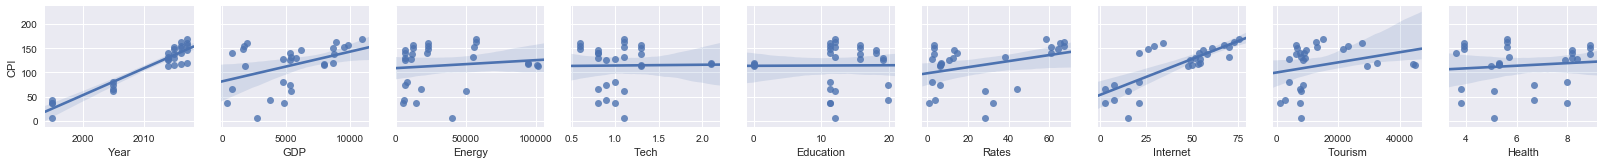

In [36]:
sns.pairplot(data = df2, y_vars = ['CPI'], x_vars = ['Year', 'GDP', 'Energy', 'Tech', 'Education', 'Rates', 'Internet', 'Tourism', 'Health'], kind = 'reg')
plt.show()

**From this set of scatter plots for BRICS countries, we observe that:**
- CPI is positively related to Year, GDP, Tech, Rates, Internet and Tourism;
- the relation between CPI and variables such as Energy, Education, and Health is not as strong.

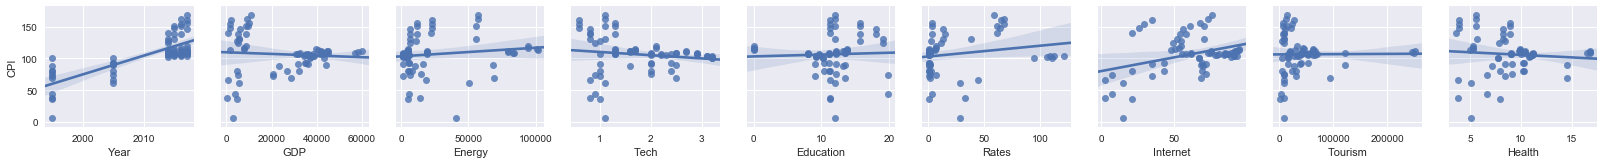

In [37]:
sns.pairplot(data = df, y_vars = ['CPI'], x_vars = ['Year', 'GDP', 'Energy', 'Tech', 'Education', 'Rates', 'Internet', 'Tourism', 'Health'], kind = 'reg')
plt.show()

**From this set of scatter plots for BRICS countries, we observe that:**
- CPI is positively related to Year, GDP, Tech, Rates, Internet and Tourism;
- the relation between CPI and variables such as Energy, Education, and Health is not as strong.

### Summary for variables selected:

- CPI: Consumer price index (General)
- GDP: GDP per capita (US dollars)
- Energy: Primary energy production (petajoules)
- Tech: Gross domestic expenditure on R & D: as a percentage of GDP (%)
- Education: Public expenditure on education (% of government expenditure)
- Rates: Exchange rates: period average (national currency per US dollar)
- Internet: Percentage of individuals using the interne
- Tourism: Tourism expenditure (millions of US dollars)
- Health: Current health expenditure (% of GDP)

New created variables:
- Country: name of each country in G7 and BRICS
- Country_code: 1 - 7 for G7 countries, 8 - 12 for BRICS countries
- CPI_level: 1 - 4 based on CPI value:
    - CPI > 150: high CPI (class 4)
    - 120 < CPI <= 150: medium CPI (class 3)
    - 80 <= CPI <= 120: stable CPI (class 2)
    - CPI <= 80: low CPI (class 1)
  

## 5. Data Modeling:

### Predictor variables:
- Year: categorical 
    - 6 levels: 1995, 2005, 2014, 2015, 2016, 2017
- Country_code: 
    - 7 levels for G7 (1 to 7)
    - 5 levels for BRICS (8 to 12)
- GDP: numeric
- Energy: numeric
- Tech: numeric
- Education: numeric
- Rates: numeric
- Internet: numeric
- Tourism: numeric
- Health: numeric
- Group (used in multiple linear regression only): categorical
    - 1 if the country is one of G7
    - 2 if the country is one of BRICS

### Response variable:

In part I: CPI_level 
- categorical variable with 4 categories (1, 2, 3, and 4)
  - CPI > 150: high CPI (class 4)
  - 120 < CPI <= 150: medium CPI (class 3)
  - 80 <= CPI <= 120: stable CPI (class 2)
  - CPI <= 80: low CPI (class 1)
  
In part II: CPI
- numeric value of CPI

### Structure:
#### Part I: predcition on range of CPI (categorical):
  
(1) G7 countries modeling:
  - KNN classifier
  - Naive Bayes classifier
  
(2) BRICS countires modeling:
  - KNN classifier
  - Naive Bayes classifier
  
(3) G7 and BRICS combined:
  - KNN classifier
  - Naive Bayes classifier

#### Part II: prediction on CPI (numeric):

Multiple regression models on:
- G7 countries
- BRICS countries
- G7 and BRICS combined


In [38]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model, preprocessing, model_selection

In [39]:
# handling warning messages:
import warnings
warnings.filterwarnings('ignore')

## Part I: predicting CPI as categorical variables:


### Transform categorical variable using OneHotEncoder:

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
encode = OneHotEncoder(sparse = False)

In [42]:
df1 = pd.concat([df1, pd.DataFrame(encode.fit_transform(df1[["Country_code"]]), columns = G7)], axis = 1)
df2 = pd.concat([df2, pd.DataFrame(encode.fit_transform(df2[["Country_code"]]), columns = BRICS)], axis = 1)
print(df1.columns)
print(df2.columns)

Index(['Year', 'CPI', 'GDP', 'Energy', 'Tech', 'Education', 'Rates',
       'Internet', 'Tourism', 'Health', 'Country', 'Country_code', 'CPI_Level',
       'United States of America', 'Germany', 'France', 'Japan', 'Canada',
       'United Kingdom', 'Italy'],
      dtype='object')
Index(['Year', 'CPI', 'GDP', 'Energy', 'Tech', 'Education', 'Rates',
       'Internet', 'Tourism', 'Health', 'Country', 'Country_code', 'CPI_Level',
       'Brazil', 'Russian Federation', 'India', 'China', 'South Africa'],
      dtype='object')


### Cross Validation sets:

In [43]:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,13,14,15,16,17,18,19]].astype(float)
y1 = df1.iloc[:, 12]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,13,14,15,16,17]].astype(float)
y2 = df2.iloc[:, 12]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = df1.Country_code)
print("training and testing sets for G7 countries:")
print((x1_train).shape)
print((x1_test).shape)
print(x1.shape)

x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = df2.Country_code)
print("training and testing sets for BRICS countries:")
print((x2_train).shape)
print((x2_test).shape)
print(x2.shape)

training and testing sets for G7 countries:
(32, 16)
(9, 16)
(41, 16)
training and testing sets for BRICS countries:
(22, 14)
(6, 14)
(28, 14)


### (1) G7 countries

### (a) KNN classifier:

In [44]:
knn = KNeighborsClassifier()
knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print("predicted: ", prediction)
print("actual: ", y1_test.values)
confusion_matrix(y1_test, prediction)

predicted:  [2 2 2 2 2 2 2 2 2]
actual:  [2 2 2 2 2 2 2 2 2]


array([[9]])

### Paramter search using GridSearchCV:

In [45]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x1_train, y1_train)

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
print(n)
print(knn_grid.best_score_ )

knn.fit(x1_train, y1_train)
prediction = knn.predict(x1_test)
print("predicted: ", prediction)
print("actual: ", y1_test.values)
confusion_matrix(y1_test, prediction)

1
0.90625
predicted:  [2 2 2 2 2 2 1 2 2]
actual:  [2 2 2 2 2 2 2 2 2]


array([[0, 0],
       [1, 8]])

### (b) Naive Bayes Classifier:

In [46]:
naiveBayes = GaussianNB()
naiveBayes.fit(x1_train, y1_train)
print("predicted: ", naiveBayes.predict(x1_test))
print("actual: ", y1_test.values)
confusion_matrix(y1_test, naiveBayes.predict(x1_test))

predicted:  [2 2 2 2 2 2 1 2 2]
actual:  [2 2 2 2 2 2 2 2 2]


array([[0, 0],
       [1, 8]])

### (2) BRICS countires

### (a) KNN classifier:

In [47]:
knn = KNeighborsClassifier()
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print("predicted: ", prediction)
print("actual: ", y2_test.values)
confusion_matrix(y2_test, prediction)

predicted:  [3 2 3 3 3 1]
actual:  [3 2 4 1 1 1]


array([[1, 0, 2, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

### Paramter search using GridSearchCV:

In [48]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x2_train, y2_train)
print(n)
print(knn_grid.best_score_ )

n = knn_grid.best_params_['n_neighbors']
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x2_train, y2_train)
prediction = knn.predict(x2_test)
print("predicted: ", prediction)
print("actual: ", y2_test.values)
confusion_matrix(y2_test, prediction)

1
0.6363636363636364
predicted:  [3 2 4 4 3 1]
actual:  [3 2 4 1 1 1]


array([[1, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

### (b) Naive Bayes Classifier:

In [49]:
naiveBayes = GaussianNB()
naiveBayes.fit(x2_train, y2_train)
print("predicted: ", naiveBayes.predict(x2_test))
print("actual: ", y2_test.values)
confusion_matrix(y2_test, naiveBayes.predict(x2_test))

predicted:  [3 2 4 1 1 1]
actual:  [3 2 4 1 1 1]


array([[3, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

### (3) G7 and BRICS combined:

### Cross Validation sets:

In [50]:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y1 = df1.iloc[:, 12]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11]].astype(float)
y2 = df2.iloc[:, 12]

x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

x.reset_index(inplace = True)
x = pd.concat([x, pd.DataFrame(encode.fit_transform(x[["Country_code"]]), columns = G7 + BRICS)], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined:")
print((x_train).shape)
print((x_test).shape)
print(x.shape)

training and testing sets for two datasets combined:
(55, 23)
(14, 23)
(69, 23)


### (a) KNN classifier:

In [51]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("predicted: ", prediction)
print("actual: ", y_test.values)
confusion_matrix(y_test, prediction)

predicted:  [4 2 2 2 3 2 2 2 3 1 2 2 4 2]
actual:  [1 2 2 2 3 2 2 2 3 1 2 2 3 2]


array([[1, 0, 0, 1],
       [0, 9, 0, 0],
       [0, 0, 2, 1],
       [0, 0, 0, 0]])

### Paramter search using GridSearchCV:

In [52]:
grids = {'n_neighbors': np.arange(1, 10), 'weights': ['uniform','distance']}
knn_grid = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_grid, grids, cv = 5)
knn_grid.fit(x_train, y_train)

n = knn_grid.best_params_['n_neighbors']
print(n)
print(knn_grid.best_score_ )

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("predicted: ", prediction)
print("actual: ", y_test.values)
confusion_matrix(y_test, prediction)

1
0.8363636363636363
predicted:  [3 2 2 1 3 2 2 2 4 1 2 2 4 2]
actual:  [1 2 2 2 3 2 2 2 3 1 2 2 3 2]


array([[1, 0, 1, 0],
       [1, 8, 0, 0],
       [0, 0, 1, 2],
       [0, 0, 0, 0]])

### (b) Naive Bayes Classifier:

In [53]:
naiveBayes = GaussianNB()
naiveBayes.fit(x_train, y_train)
print("predicted: ", naiveBayes.predict(x_test))
print("actual: ", y_test.values)
(confusion_matrix(y_test, naiveBayes.predict(x_test)))

predicted:  [1 2 2 1 3 1 2 2 3 1 2 2 4 2]
actual:  [1 2 2 2 3 2 2 2 3 1 2 2 3 2]


array([[2, 0, 0, 0],
       [2, 7, 0, 0],
       [0, 0, 2, 1],
       [0, 0, 0, 0]])

### Part II: predicting CPI as a numeric variable
### Cross Validation sets:

In [54]:
# treat country_code as categorical variable:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11]]
y1 = df1.iloc[:, 1]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11]]
y2 = df2.iloc[:, 1]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = x1.Country_code)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = x2.Country_code)

x1["Group"] = 1
x2["Group"] = 2
x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

x.reset_index(inplace = True)
x.drop("index", axis = 1, inplace = True)
x = pd.concat([x, pd.DataFrame(encode.fit_transform(x[["Group"]]), columns = ["G7", "BRICS"])], axis = 1)
x_origin = x.copy()
x = pd.concat([x, pd.DataFrame(encode.fit_transform(x[["Country_code"]]), columns = G7 + BRICS)], axis = 1)

# for MLR modeling:
df = pd.concat([x, y.reset_index().iloc[:, 1]], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined:")
print((x_train).shape)
print((x_test).shape)
print(x.shape)

# for future predictions (with country_code):
x_train_code, x_test_code, y_train_code, y_test_code = train_test_split(x_origin, y, test_size = 0.2, random_state = 1, stratify = x.Country_code)
print("training and testing sets for two datasets combined (without tranforming country_code):")
print((x_train_code).shape)
print((x_test_code).shape)
print(x_origin.shape)

training and testing sets for two datasets combined:
(55, 25)
(14, 25)
(69, 25)
training and testing sets for two datasets combined (without tranforming country_code):
(55, 13)
(14, 13)
(69, 13)


In [55]:
# treat country_code as categorical variable:
x1 = df1.iloc[:, [0,2,3,4,5,6,7,8,9,11,13,14,15,16,17,18,19]]
y1 = df1.iloc[:, 1]
x2 = df2.iloc[:, [0,2,3,4,5,6,7,8,9,11,13,14,15,16,17]]
y2 = df2.iloc[:, 1]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 1, stratify = x1.Country_code)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1, stratify = x2.Country_code)

x1["Group"] = 1
x2["Group"] = 2
x = pd.concat([x1, x2])
y = pd.concat([y1, y2])

# G7 and BRICS combined:
df = pd.concat([df1.iloc[:, 0:12], df2.iloc[:, 0:12]])
df["Group"] = [1 if country in code1.keys() else 2 for country in df.Country]

x.fillna(0, inplace = True)
x.reset_index(inplace = True)
x.drop("index", axis = 1, inplace = True)

# transform group_code into categorical variables
x = pd.concat([x, pd.DataFrame(encode.fit_transform(x[["Group"]]), columns = ["G7", "BRICS"])], axis = 1)
x.drop(["Country_code", "Group"], axis = 1, inplace = True)
x.head()

names = list(pd.concat([df1["Country_code"], df2["Country_code"]], axis = 0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1, stratify = names)

print("training and testing sets for two datasets combined:")
print((x_train).shape)
print((x_test).shape)
print(x.shape)

training and testing sets for two datasets combined:
(55, 23)
(14, 23)
(69, 23)


### Multiple linear regression model for G7:

In [56]:
linear1 = linear_model.LinearRegression()
linear1.fit(x1_train, y1_train)
linear1.score(x1_train, y1_train)

0.9790321699206759

### Multiple linear regression model for BRICS:

In [57]:
linear2 = linear_model.LinearRegression()
linear2.fit(x2_train, y2_train)
linear2.score(x2_train, y2_train)

0.9976081706467266

### Multiple linear regression model for G7 and BRICS combined:

In [58]:
linear = linear_model.LinearRegression()
linear.fit(x_train, y_train)
linear.score(x_train, y_train)

0.949962453178838

### Cross Validation on linear model:

In [59]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear1, x1, y1, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.86995317 0.69910805 0.81791207]
0.7956577629513454


In [60]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear2, x2, y2, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.98198244 0.95467614 0.72744145]
0.8880333435928586


In [61]:
cv = model_selection.ShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 0)
cv_linear = model_selection.cross_val_score(linear, x, y, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[ 0.82530071  0.82886747 -0.09777121]
0.5187989903058788


### Test Statistics from ANOVA:
Note: with the issue of overfitting

In [62]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [63]:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Rates + Internet + Tourism + Health + C(Country_code)", data = df1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     62.03
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           5.40e-16
Time:                        22:29:51   Log-Likelihood:                -84.711
No. Observations:                  41   AIC:                             201.4
Df Residuals:                      25   BIC:                             228.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2380.5701 

In [64]:
# Final MLR model for G7 countries:
model = smf.ols("CPI ~ Year + GDP  + Energy + Health + C(Country_code)", data = df1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     71.95
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           3.61e-18
Time:                        22:29:51   Log-Likelihood:                -93.425
No. Observations:                  41   AIC:                             208.8
Df Residuals:                      30   BIC:                             227.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2583.7889 

In [65]:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Internet + Tourism + Health + C(Country_code)", data = df2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     154.3
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.91e-13
Time:                        22:29:51   Log-Likelihood:                -78.305
No. Observations:                  28   AIC:                             182.6
Df Residuals:                      15   BIC:                             199.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6586.60

In [66]:
# Final MLR model for BRICS:
df2.GDP = df2.GDP ** 0.5
model = smf.ols("CPI ~ Year + GDP + Energy + Internet + Health + C(Country_code)", data = df2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           2.80e-16
Time:                        22:29:51   Log-Likelihood:                -80.832
No. Observations:                  28   AIC:                             181.7
Df Residuals:                      18   BIC:                             195.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6730.86

In [67]:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Internet + Tourism + Health + C(Group) + C(Country_code)", data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     26.34
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           2.11e-19
Time:                        22:29:52   Log-Likelihood:                -249.85
No. Observations:                  69   AIC:                             539.7
Df Residuals:                      49   BIC:                             584.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -3231.34

In [68]:
# transformation on GDP for BRICS:
df.GDP = df.GDP ** 0.5

In [69]:
simplified = smf.ols("CPI ~ Year + GDP + C(Group) + C(Country_code) + Tech + Internet + Health + Energy", data = df)
results = simplified.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     30.27
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           9.00e-21
Time:                        22:29:53   Log-Likelihood:                -250.23
No. Observations:                  69   AIC:                             536.5
Df Residuals:                      51   BIC:                             576.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -2503.67

### Checking assumptions of linear model:

In [70]:
# Linearity and constant variance
pred_val = results.fittedvalues.copy()
true_val = df.CPI.values.copy()
residual = true_val - pred_val
plt.subplots(figsize = (6, 2.5))
#plt.figure(figsize = (6, 2.5))
# plt.subplot(1, 2, 1)
plt.scatter(pred_val, residual)
plt.title("residuals vs. fitted values")
plt.plot(np.mean(residual))
plt.ylabel("residuals")
plt.xlabel("fitted values")
print("Average of residuals: ", np.mean(residual))

Average of residuals:  2.441826451183221e-11


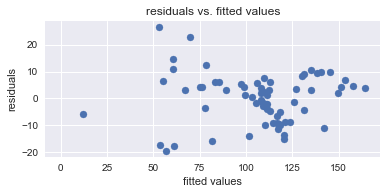

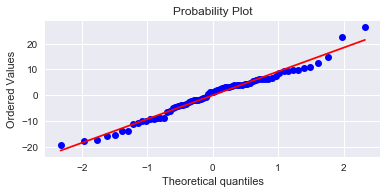

In [71]:
# normality of error terms:
import scipy as sp
fig, ax = plt.subplots(figsize = (6, 2.5))
sp.stats.probplot(residual, plot = ax, fit = True)
plt.show()

### Modeling on other countries from G20 (not in G7 nor in BRICS):

In [72]:
# testing on G20 countries (not in G7 nor in BRICS) (Note: no data entry for South Korea, and only one entry for Argentina)
# added test countries: New Zealand and Singapore
testing = ["Australia", 'Saudi Arabia', 'India', 'Turkey', 'Mexico', 'Indonesia', 'New Zealand', 'Singapore']  # Argentina
CPI.loc[years, testing]

Country,Australia,Saudi Arabia,India,Turkey,Mexico,Indonesia,New Zealand,Singapore
Year,,,,,,,,
1995,67.6,NaN,37.6,1.3,26.4,19.4,71.7,81.5
2005,86.3,81.4,65.8,65.9,80.5,68.7,87.0,88.0
2014,110.4,112.9,140.8,135.7,116.2,124.4,107.6,113.8
2015,112.0,114.4,147.7,146.1,119.4,132.3,107.9,113.2
2016,113.5,116.7,155.0,157.4,122.8,137.0,108.6,112.6
2017,115.7,115.7,160.1,175.0,130.2,142.2,110.7,113.3


In [73]:
df_test = pd.DataFrame()
for name in testing: 
    table = pd.DataFrame(CPI.stack().loc[list(years), name])
    table = pd.concat([table, pd.DataFrame(GDP.stack().loc[list(years), name]), pd.DataFrame(energy.stack().loc[list(years), name]), pd.DataFrame(tech.stack().loc[list(years), name]), pd.DataFrame(education.stack().loc[list(years), name]), pd.DataFrame(rates.stack().loc[list(years), name]), pd.DataFrame(internet.stack().loc[list(years), name]), pd.DataFrame(tourism.stack().loc[list(years), name]), pd.DataFrame(health.stack().loc[list(years), name])], keys = ["CPI", "GDP", "Energy", "Tech", "Education", "Rates", "Internet", "Tourism", "Health"], axis = 1)
    table.fillna(method = "ffill", inplace = True)
    table.fillna(method = "bfill", inplace = True)
    df_test = pd.concat([df_test, table])
    
df_test.fillna(0, inplace = True)

df_test.columns = df_test.columns.droplevel(1)
df_test["Country"] = df_test.index.get_level_values(1)
df_test.index = df_test.index.droplevel(1)
df_test.reset_index(inplace = True)

In [74]:
code_test = {"Australia" : 13, "Saudi Arabia" : 14, "India" : 15, "Turkey" : 16, "Mexico" : 17, "Indonesia" : 18, 'New Zealand' : 19, 'Singapore' : 20}
group_code = {"Australia" : 1, "Saudi Arabia" : 1, "India" : 2, "Turkey" : 2, "Mexico" : 2, "Indonesia" : 2, 'New Zealand' : 1, 'Singapore' : 1}

df_test["Country_code"] = [code_test[country] for country in df_test.Country]
df_test["Group"] = [group_code[country] for country in df_test.Country]
df_test["CPI_Level"] = [4 if var > 150 else 3 if var > 120 else 2 if var > 80 else 1 for var in df_test["CPI"]]

In [75]:
df_test.head()

,Year,CPI,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country,Country_code,Group,CPI_Level
0,1995,67.6,21635.0,7784.0,1.9,13.6,1.3,63.0,10370.0,8.0,Australia,13,1,1
1,2005,86.3,37571.0,11451.0,1.9,13.6,1.3,63.0,19719.0,8.0,Australia,13,1,2
2,2014,110.4,37571.0,15272.0,1.9,13.9,1.1,84.0,19719.0,9.1,Australia,13,1,2
3,2015,112.0,52388.0,15930.0,1.9,13.9,1.3,84.6,30872.0,9.4,Australia,13,1,2
4,2016,113.5,54067.0,16322.0,1.9,13.9,1.3,86.5,36786.0,9.4,Australia,13,1,2


In [76]:
x_test = df_test.iloc[:, [0,2,3,4,5,6,7,8,9,11,12]]
y_test = df_test.iloc[:, 1]

x_test.reset_index(inplace = True)
x = pd.concat([x_test, pd.DataFrame(encode.fit_transform(x_test[["Group"]]), columns = ["G7", "BRICS"])], axis = 1)
x.drop("index", axis = 1, inplace = True)

# for MLR modeling:
df_testing = pd.concat([x, y_test.reset_index().iloc[:, 1]], axis = 1)
x.head()

,Year,GDP,Energy,Tech,Education,Rates,Internet,Tourism,Health,Country_code,Group,G7,BRICS
0,1995,21635.0,7784.0,1.9,13.6,1.3,63.0,10370.0,8.0,13,1,1.0,0.0
1,2005,37571.0,11451.0,1.9,13.6,1.3,63.0,19719.0,8.0,13,1,1.0,0.0
2,2014,37571.0,15272.0,1.9,13.9,1.1,84.0,19719.0,9.1,13,1,1.0,0.0
3,2015,52388.0,15930.0,1.9,13.9,1.3,84.6,30872.0,9.4,13,1,1.0,0.0
4,2016,54067.0,16322.0,1.9,13.9,1.3,86.5,36786.0,9.4,13,1,1.0,0.0


In [77]:
# new model for new observations:
model = smf.ols("CPI ~ Year + GDP  + Energy + Tech + Education + Internet + Tourism + Health + C(Group) + C(Country_code)", data = df_testing)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     38.88
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           2.84e-16
Time:                        22:29:56   Log-Likelihood:                -169.72
No. Observations:                  48   AIC:                             371.4
Df Residuals:                      32   BIC:                             401.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6069.98

In [78]:
df_testing.GDP = df_testing.GDP ** 0.5

In [79]:
# new model for new observations:
model = smf.ols("CPI ~ Year + GDP  + Energy + Education + Internet + Health + C(Group) + C(Country_code)", data = df_testing)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    CPI   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     45.39
Date:                Mon, 03 Jun 2019   Prob (F-statistic):           1.29e-17
Time:                        22:29:56   Log-Likelihood:                -170.83
No. Observations:                  48   AIC:                             369.7
Df Residuals:                      34   BIC:                             395.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6002.86

## 6. Results and Analysis:

### Part I: predicting CPI range (categorical)
#### Results:
- G7 countries:
    - KNN: tends to predict higher CPI range.
    - Naive Bayes: tends to predict higher CPI range.
    - Summary: two classifiers have very similar classification outcomes.
- BRICS:
    - KNN: tends to predict higher CPI range.
    - Naive Bayes: correctly classified all labels in the testing set.
    - Summary: has higer correct classification rate than KNN.
- G7 and BRICS:
    - KNN: tends to have misclassifications on class 1 and class 3.
    - Naive Bayes: tends to have misclssifications on class 1.
    - Summary: Naive Bayes classifier classifies the label better than KNN classifier.
    
#### Analysis:
(1) Analysis on two types of classifiers:
- In KNN classifier, we are looking for the neareast neighbors based on Euclidean distances to decide which class the input belongs to. 
- In Naive Bayes classifier, we assumed that predictor variables are independent from each other. This is an important simpification in our model, since the macroeconomic predictors (such as GDP, expenditure on energy, expenditure on education, etc.) that we have choosen to use are, to some degree, independent factors that represent the economic growth of countries.
- Based on the fact that Naive Bayes classifier has a reasonable assumption that can largely simplify the analysis and increase the accuracy of the classification, we suggest using Naive Bayes classification method in this model.

(2) Analysis on three ways of making the classification:
- In the classification for G7 countries, it can be observed that there are only two possible labels for the range of CPI: 1 (low CPI) and 2 (moderate CPI). 
- In the classification for BRICS countries, there are four different labels for the range of CPI, varying from 1 to 4.
- The difference between the total number of output classes reflects the fact that these two groups of countries have quite different economic growth pattern, i.e., the developed countries in G7 tend to have more stable range of CPI, while the developing countries in BRICS tend to have more fluctuations in the range of CPI.
- This difference between CPI of G7 and BRICS can be observed from the output of three classifications: the correct classification rate is higher when we seperated countries into G7 and BRICS countries.
- Therefore, it is more reasonable to analyze the CPI range of G7 and BRICS countries seperately, based on the situation that developed countries and developing countries tend to have large amount of variation in their ecnomic growth pattern.

### Part II: predicting CPI value (numeric)
#### Results:
- MLR model for G7 countries:
    - $R^{2}_{adj}$: 0.906
    - CV score: 0.6131
- BRICS:
    - $R^{2}_{adj}$: 0.986
    - CV score: 0.6869
- G7 and BRICS:
    - $R^{2}_{adj}$: 0.870
    - CV score: 0.8208
- New testing set of countries:
    - $R^{2}$: 0.2678
    - $R^{2}_{adj}$ of new model: 0.924
    
#### Analysis:
- ANOVA:
    
    Based on the ANOVA for each three types of models - G7, BRICS, and two groups combined, we notice that the multiple linear regression models for G7 and BRICS both have very high $R^{2}_{adj}$, meaning that the variables selected can explain a large amount of variation of CPI. 
    
    (1) From ANOVA of G7, it can be observed that variables Tech, Education, Tourism, Internet and Rates are not statistically significant predictors, based on significance level $\alpha = 0.05$. After removing these five predictors from the model, we notice that our model is highly simplified, and at the same token, the $R^{2}_{adj}$ of the model remains at 0.947. 
    
    Thus, our final model for G7 countries is: 
    
    $$CPI = \beta_0 + \beta_1Year + \beta_2GDP + \beta_3Energy + \beta_4Health + C(Country\_code)$$
    
    (2) From ANOVA of BRICS, we observe that predictors GDP, Tech, Education and Tourism are not statistically significant in predicting the response, using significance level $\alpha = 0.05$. Instead of removing all of these insignificant predictors, we decided to make a transformation on GDP, and remove the other three predictors. After performing the transformation on GDP and removing three predictors, we observe that the $R^{2}_{adj}$ of the new reduced model remains at 0.986. 
    
    Thus, our final model for BRICS countries is: 
    
    $$CPI = \beta_0 + \beta_1Year + \beta_2\sqrt{GDP} + \beta_3Energy + \beta_4Internet + \beta_5Health + C(Country\_code)$$
    
    (3) Similarly, from the ANOVA for two groups combined, we observe that GDP, Tech, Education and Tourism are not statistically significant predictors. After transforming GDP and  removing other predictors, we see that $R^{2}_{adj}$ actually increased to be 0.880.
    
    Therefore, the final model for two groups combined is: 
    
    $$CPI = \beta_0 + \beta_1Year + \beta_2\sqrt{GDP} + \beta_3Energy + \beta_4Internet + \beta_5Health + \beta_6Tech + C(Country\_code) + C(Group\_code)$$

- Cross Validation: 

    Although $R^{2}_{adj}$ of regression models on G7 and on BRICS are both above 90%, when we did cross validation on these two models, the cv scores are not as good as the cv score for regression model using G7 and BRICS combined. This shows that when we seperate our data into G7 and BRICS and build two models, the model tends to be overfitting (**low bias but high variance**); similarly, when we build a model for two groups of countries combined, the model also tends to be overfitting (**low bias but high variance**).
    
    
- MLR model on new observations:

    In addition to cross validating the models, we also took a look at how would the model be like when there are new observations. We selected some countries from G20 that are not inside G7 and not inside BRICS, and a few more countries. The new set of observations consists of both developed countries and developing countries, which is similar to what we have in the model for G7 and BRICS combined. The new observations that we selected are Australia, Saudi Arabia, India, Turkey, Mexico, Indonesia, New Zealand, and Singapore.
    
    Based on the ANOVA output of two different models, the full model and the reduced model, we observe that the reduced model employs fewer predictors, but has a higher $R^{2}_{adj}$ score.
    
    Similar to what we have in the G7 and BRICS combined model, the MLR model we decided to use for the new observations is:
    
    $$CPI = \beta_0 +  \beta_1Year + \beta_2\sqrt{GDP} + \beta_3Energy + \beta_4Internet + \beta_5Health + \beta_6Education + C(Country\_code) + C(Group\_code)$$


## 7. Conclusion and Discussion:

**Classification designs:**
  - KNN classifier and Naive Bayes classifier have very similar classification performances.
  - However, Naive Bayes classifier, in general, has a higher classification correction rate.
  - The important assumption in Naive Bayes is that predictor variables are independent. This is a reasonable assumption in our modeling, since the predictor variables are macro-economics variables that can be seen approximately independent from each other.
  - Based on this assumption of Naive Bayes classifier, which highly simpifies the classification model and maintains a good performance, we suggest using this classifier in predicting the range of CPI.

**Regression designs:**
   - In MLR models for G7 and BRICS, it can be observed that important predictor variables for both models are Year, GDP, Energy, Health and country name itself. 
   - In MLR model for G7 and BRICS combined, it can be easily seen that Year, GDP, Energy, Health, country name and group category are important predictors. 
   - The fact that group code is a statistically significant predictor variable shows countries in G7 (mostly highly developed ones) and countries in BRICS (developing countries with rapid economic growth) have quite different economic growth pattern. This difference in these two groups suggest that it might be a better idea to model CPI of developed countries and developing separately. 
   - However, the drawback of building two indiviual models is overfitting issue. It can be clearly seen that models for G7 and BRICS have a relatively higher $R^{2}_{adj}$ than that in the model for two groups combined. But based on cross validation, we see that the variance of the error of prediction in these two models is quite large.
   - Therefore, our suggestion is we should choose which model to use based on the context: if we want to predict CPI for only developed countries (or developing countries), it would be better to build a model using training data of developed countries (or developing countries) only; on the other hand, if we want a general model for predictin CPI for both developed countries and developing ones, it would be optimal to build the model based on training data containing both types of countries.
   
**Discussion and possible improvements:**
   - Since we only chose to predict CPI for countries from G7 and BRICS, the size of the training data is not very large. We would like to incorporate more entries of other countries into our modeling to enhance the model performance.
   - We also want to further explore the between the devlopment difference between G7 and BRICS countries. Although CPI is not calculated based on hard metrics (it is a reflection of the fluctuation of prices), it would be interesting to see how CPI is related to certain variables at macroeconomic level.

## 8. References:

- Description of CPI data: http://data.un.org/_Docs/SYB/PDFs/SYB61_T19_Consumer%20Price%20Index.pdf
- G7 countries: https://en.wikipedia.org/wiki/Group_of_Seven
- BRICS countries: https://en.wikipedia.org/wiki/BRICS
- G20 countries: https://en.wikipedia.org/wiki/G20

- Factors related to CPI: https://www.investopedia.com/terms/c/consumerpriceindex.asp